<table  align="left" width="100%"> <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="..\images\qworld.jpg" width="35%" align="left"></a></td>
        <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
            prepared by Özlem Salehi (<a href="http://qworld.lu.lv/index.php/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h1> Introduction to Qiskit </h1>

<hr>

You can import Qiskit using the following command:

In [1]:
import qiskit

<hr>

<h2>Creating quantum and classical registers</h2>

In Qiskit, we use a _quantum register_ to store our qubits.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# 4 is the number of qubits we want to create
# qreg is the name of the quantum register
qreg =  QuantumRegister(4) 

In [3]:
# You can give any name to your register
output = QuantumRegister(1)

Whenever a qubit is measured (which will be discussed soon), the result should be stored in a classical bit. We create a _classical register_ to store our classical bits.

In [4]:
# 4 is the number of classical bits we want to create
# creg is the name of the classical register
creg = ClassicalRegister(4) 

<hr>
<h2>Creating Circuits</h2>

A quantum circuit is composed of quantum and classical registers.

In [5]:
# Creating a quantum circuit consisting of quantum register qreg and classical register creg
circuit = QuantumCircuit(qreg,creg)

In [6]:
# You can create a quantum circuit with multiple quantum registers
circuit2 = QuantumCircuit(qreg, output, creg)

In [7]:
# You can create a quantum circuit consisting of only a quantum register if no measurement will take place
circuit3 = QuantumCircuit(qreg)

In [8]:
# Creating a quantum circuit without specfiying any registers is also possible 
# Creates a quantum circuit with 3 qubits and 3 classical bits
circuit4 = QuantumCircuit(3,3)

<hr>
<h2>Gates</h2>

Here are some _gates_ and how we apply them in Qiskit. Gates are applied to quantum circuit by specifying the qubits which they apply to.

In [9]:
#Apply NOT gate to qubit 2
circuit.x(qreg[2])

#Apply Z gate to qubit 2
circuit.z(qreg[2])

#Apply H gate to qubit 3
circuit.h(qreg[3])

#Apply CNOT gate where qubit 2 is control and qubit 0 is target
circuit.cx(qreg[2],qreg[0])

#Apply CZ gate where qubit 0 is control and qubit 1 is target
circuit.cz(qreg[0],qreg[1])

#Apply SWAP gates to qubits 1 and 3 
circuit.swap(qreg[1],qreg[3])

#Apply CCNOT gate where qubit 0 and 1 are the control and qubit 2 is the target
#Note that in Qiskit, it is possible to apply gates without specifying the register
circuit.ccx(0,1,2)

Let's draw our circuit to visualize the operations.

In [10]:
circuit.draw()

┌───┐           
q0_0: ──────────┤ X ├─■──────■──
                └─┬─┘ │      │  
q0_1: ────────────┼───■──X───■──
      ┌───┐┌───┐  │      │ ┌─┴─┐
q0_2: ┤ X ├┤ Z ├──■──────┼─┤ X ├
      ├───┤└───┘         │ └───┘
q0_3: ┤ H ├──────────────X──────
      └───┘                     
c0: 4/══════════════════════════

You may also use matplotlib to visualize your circuits.

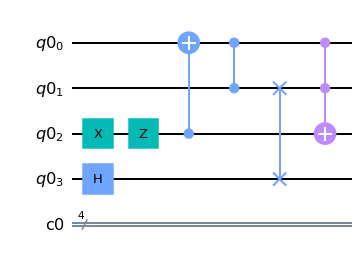

In [11]:
circuit.draw(output='mpl')

### Task 1
    
Create a quantum circuit with 10 qubits. 

1. Apply $H$ gate to qubit 0. 
2. Apply nine $CNOT$ gates where qubit $0$ is the control and qubit $i$ is the target for $i=1\cdots9$.

Draw your circuit.

[click for our solution](A00_Qiskit_Introduction_Solutions.ipynb#task1)

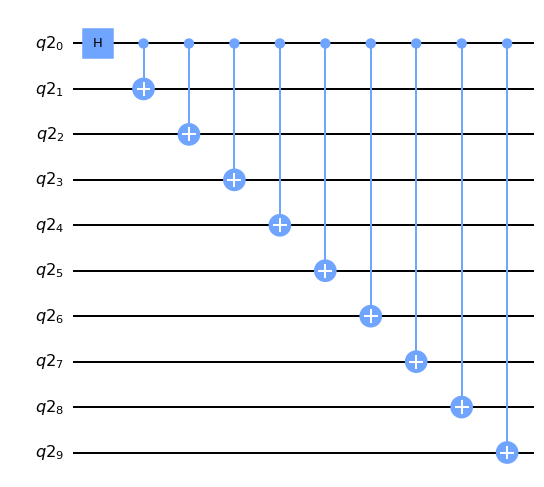

In [12]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

#
qreg = QuantumRegister(10)
circuit = QuantumCircuit(qreg)
circuit.h(0)
for i in range(1,10):
    circuit.cx(0,i)

circuit.draw(output="mpl")
#


<h2> More about gates </h2>

It is possible to apply a gate to multiple qubits at once.

In [13]:
# Create a new circuit
circuit2 = QuantumCircuit(qreg,creg)
circuit2.h(qreg)
circuit2.draw()

┌───┐
q2_0: ┤ H ├
      ├───┤
q2_1: ┤ H ├
      ├───┤
q2_2: ┤ H ├
      ├───┤
q2_3: ┤ H ├
      ├───┤
q2_4: ┤ H ├
      ├───┤
q2_5: ┤ H ├
      ├───┤
q2_6: ┤ H ├
      ├───┤
q2_7: ┤ H ├
      ├───┤
q2_8: ┤ H ├
      ├───┤
q2_9: ┤ H ├
      └───┘
c0: 4/═════

<i>controlled</i> function creates the controlled version of a gate.

In [14]:
# To be able to use the control function with H gate, we need to import H gate class
from qiskit.circuit.library.standard_gates import HGate

CCCH = HGate().control(3)

# The first 3 qubits act as the control and the last qubit is the target
circuit2.append(CCCH,[0,1,3,2])

circuit2.draw()

┌───┐     
q2_0: ┤ H ├──■──
      ├───┤  │  
q2_1: ┤ H ├──■──
      ├───┤┌─┴─┐
q2_2: ┤ H ├┤ H ├
      ├───┤└─┬─┘
q2_3: ┤ H ├──■──
      ├───┤     
q2_4: ┤ H ├─────
      ├───┤     
q2_5: ┤ H ├─────
      ├───┤     
q2_6: ┤ H ├─────
      ├───┤     
q2_7: ┤ H ├─────
      ├───┤     
q2_8: ┤ H ├─────
      ├───┤     
q2_9: ┤ H ├─────
      └───┘     
c0: 4/══════════

One can define new gates by arithmetic operations as well

In [15]:
from qiskit.circuit.library.standard_gates import XGate
ROOTX = XGate().power(exponent=0.5)
circuit2.append(ROOTX,[1])
circuit2.draw()

┌───┐              
q2_0: ┤ H ├──■───────────
      ├───┤  │  ┌───────┐
q2_1: ┤ H ├──■──┤ x^0.5 ├
      ├───┤┌─┴─┐└───────┘
q2_2: ┤ H ├┤ H ├─────────
      ├───┤└─┬─┘         
q2_3: ┤ H ├──■───────────
      ├───┤              
q2_4: ┤ H ├──────────────
      ├───┤              
q2_5: ┤ H ├──────────────
      ├───┤              
q2_6: ┤ H ├──────────────
      ├───┤              
q2_7: ┤ H ├──────────────
      ├───┤              
q2_8: ┤ H ├──────────────
      ├───┤              
q2_9: ┤ H ├──────────────
      └───┘              
c0: 4/═══════════════════

### Task 2
    
Create a quantum circuit with 10 qubits. 

1. Apply $H$ gates to all qubits.
2. Apply $X$ gate to qubit 0 controlled by qubits 1-9
2. Apply $H$ gates to all qubits.

Draw your circuit.

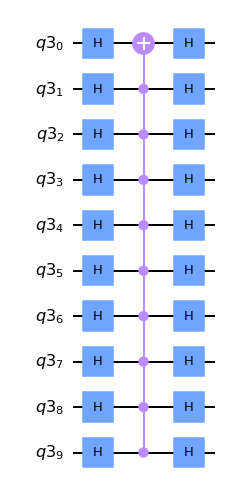

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates import XGate

#
qreg = QuantumRegister(10)
circuit = QuantumCircuit(qreg)
circuit.h(qreg)

# Create a controlled version of the NOT gate
C9X = XGate().control(9)

# Qubits 1-9 are the control and qubit 0 is the target
circuit.append(C9X,list(range(1,10)) + [0])

circuit.h(qreg)
circuit.draw(output="mpl")
#


[click for our solution](A00_Qiskit_Introduction_Solutions.ipynb#task2)

<hr>
<h2>Running Circuits</h2>

One way to get results from your circuit is to measure and run it for multiple times. 

Let's first create a simple circuit and measure it. 

In [17]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create quantum and classical registers with 2 qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(2) 

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to qubit 0
circuit.h(qreg[0])

# Measure both qubits
circuit.measure(qreg,creg)

Next we will create a _job_ object and use the _execute_ method of Qiskit to run our circuit multiple times and take samples.

In [18]:
# We will use the method "execute" and the object "Aer" from qiskit library
from qiskit import execute, Aer

# This is the local simulator 
simulator = Aer.get_backend('qasm_simulator')

# circuit is the name of the circuit to be run
# simulator is the backend on which the simulation will be done
# Shots is the how many times we want to run the circuit
job = execute(circuit,simulator,shots=1000)

# Get the results as a dictionary
counts = job.result().get_counts(circuit)
print(counts) 

{'00': 503, '01': 497}


The output of the circut are the states $\ket{00}$ and $\ket{01}$ and they are measued almost equal number of times. At this point, we need to make a note about the order of the qubits in Qiskit.

Qiskit combines the two quantum bits in the following order:

$$ qreg[1], qreg[0]$$

For example, when $X$ gate is applied to qreg[0], the state $\ket{00}$ becomes $\ket{01}$. If you want to obtain state $\ket{10}$, then you should apply $X$ gate to qreg[1].


It is also possible to measure only some of the qubits. Let's only measure qreg[0] this time.

In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create quantum and classical registers with 2 qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(1) # It is enough to create a clasical register with 1 bit

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to qubit 0
circuit.h(qreg[0])

# Measure qreg[0]
circuit.measure(qreg[0],creg[0])

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit,simulator,shots=1000)

counts = job.result().get_counts(circuit)
print(counts) 

{'1': 513, '0': 487}


### Task 3
    
Implement the circuit in Task 1. Measure all the qubits and simulate your circuit for 1000 times.

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute, Aer

#
qreg = QuantumRegister(10)
creg = ClassicalRegister(10)
circuit = QuantumCircuit(qreg,creg)
circuit.h(qreg[0])

# Apply CX gates
for i in range(1,10):
    circuit.cx(qreg[0],qreg[i])
    
circuit.measure(qreg,creg)

simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit,simulator,shots=1000)
counts = job.result().get_counts(circuit)
print(counts) 
#

{'1111111111': 505, '0000000000': 495}


[click for our solution](A00_Qiskit_Introduction_Solutions.ipynb#task3)

## Debugging the circuits - State Representation

It is possible to get the exact quantum state from the simulator. You shouldn't measure your circuit before getting the state. 

We will use the _statevector_simulator_ backend of Qiskit and set the number of shots as 1 to obtain the vector representing the quantum state.

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create quantum and classical registers with 2 qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to qubit 0
circuit.h(qreg[0])

# This is the statevector simulator
vsimulator = Aer.get_backend('statevector_simulator')
job = execute(circuit,vsimulator,shots=1)

state = job.result().get_statevector()
print(state) 

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


If you use simulator after the measurement, you will observe that the quantum state has collapsed to one of the states.

In [22]:
circuit.measure(qreg,creg)
job = execute(circuit,vsimulator,shots=1)

state = job.result().get_statevector()
print(state) 

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


### Task 4
    
Create a quantum circuit with 4 qubits. Apply Hadamard gate to each qubit and $CZ$ gate to qreg[3] and qreg[2]. Use the simulator without measuring the circuit. Check the entries with negative sign.

In [23]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

#
qreg = QuantumRegister(4)
creg = ClassicalRegister(4)
circuit = QuantumCircuit(qreg,creg)
circuit.h(qreg)
circuit.cz(qreg[3],qreg[2])
vsimulator = Aer.get_backend('statevector_simulator')
job = execute(circuit,vsimulator,shots=1)

state = job.result().get_statevector()
print(state) 
#

[ 0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j
 -0.25+0.j -0.25+0.j]


[click for our solution](A00_Qiskit_Introduction_Solutions.ipynb#task4)

<hr>
<h2>Unitary Matrix Representation</h2>

It is possible to obtain <i>unitary</i> matrix representation of gates and circuits.

In [24]:
from qiskit.circuit.library.standard_gates import XGate, CXGate

ROOTX = XGate().power(exponent=0.5)

print('Unitary matrix representation of the CNOT gate')
print(CXGate().to_matrix())
print('Unitary matrix representation of the CROOTX gate we have created')
print(ROOTX.to_matrix())

Unitary matrix representation of the CNOT gate
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
Unitary matrix representation of the CROOTX gate we have created
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]


In [25]:
# Quantum register with 2 qubits
qreg = QuantumRegister(2)
circuit = QuantumCircuit(qreg)

# Apply H gate to all qubits
circuit.h(qreg)

# Unitary simulator
usimulator = Aer.get_backend('unitary_simulator')
job = execute(circuit,usimulator,shots=1)

matrix = job.result().get_unitary()

print('Unitary matrix representation of H operator on 2 qubits.')
print(matrix) 

Unitary matrix representation of H operator on 2 qubits.
[[ 0.5+0.0000000e+00j  0.5-6.1232340e-17j  0.5-6.1232340e-17j
   0.5-1.2246468e-16j]
 [ 0.5+0.0000000e+00j -0.5+6.1232340e-17j  0.5-6.1232340e-17j
  -0.5+1.2246468e-16j]
 [ 0.5+0.0000000e+00j  0.5-6.1232340e-17j -0.5+6.1232340e-17j
  -0.5+1.2246468e-16j]
 [ 0.5+0.0000000e+00j -0.5+6.1232340e-17j -0.5+6.1232340e-17j
   0.5-1.2246468e-16j]]
